# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[67, 31, 34, ..., 46, 14, 92],
       [99,  0, 57, ..., 24, 95, 49],
       [87, 29, 95, ..., 76,  6, 51],
       ...,
       [17, 92, 82, ..., 60, 41, 32],
       [17, 10, 81, ..., 31, 41, 51],
       [96, 45,  7, ...,  0, 18, 79]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [3]:
B = np.full_like(A, A)
np.random.shuffle(B.T)

In [4]:
print(B)
B.shape

[[ 1 91 81 ...  5  4 12]
 [85 42 73 ... 76 33 80]
 [63 62 25 ... 67 59 25]
 ...
 [16 65 47 ...  2 37 33]
 [33 71 35 ...  7 99 66]
 [15 95  5 ... 78 58 77]]


(200, 50)

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [5]:

arr = A[A[::, ::2].sum(axis=1) > A[::,1::2].mean()]
print(arr)
arr.shape



[[67 31 34 ... 46 14 92]
 [99  0 57 ... 24 95 49]
 [87 29 95 ... 76  6 51]
 ...
 [17 92 82 ... 60 41 32]
 [17 10 81 ... 31 41 51]
 [96 45  7 ...  0 18 79]]


(200, 50)

In [6]:
A[::, ::2].sum(axis=1) > A[::,1::2].mean()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [7]:
A.shape
B = A.max(axis=1) - A.min(axis=1)
print("index = ", B.argmax())
A[B.argmax()]

index =  1


array([99,  0, 57, 82, 89, 45, 10, 65, 66, 38, 21, 39,  0, 14, 80,  4, 69,
       42, 32, 84, 84, 73, 39, 87, 73, 87, 10, 33, 45,  0, 61, 89, 59, 63,
       85, 31, 75, 34, 65, 43, 98, 54, 14, 30, 42, 76, 57, 24, 95, 49])

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [8]:
ind = np.unravel_index(np.argsort(A,axis=None), A.shape)
A_ind = ind[0]*A.shape[1]+ind[1]
A_ind.argsort().reshape(A.shape) + 1 


array([[6696, 3140, 3407, ..., 4627, 1476, 9270],
       [9920,  107, 5694, ..., 2405, 9522, 4913],
       [8734, 2899, 9524, ..., 7589,  674, 5084],
       ...,
       [1814, 9250, 8228, ..., 6034, 4051, 3208],
       [1807, 1037, 8108, ..., 3090, 4116, 5085],
       [9649, 4500,  838, ...,   93, 1885, 7908]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [9]:
arr_min = np.tile(A.min(axis=1).reshape((A.shape[0],1)), (1,A.shape[1]))
arr_max = np.tile(A.max(axis=1).reshape((A.shape[0],1)), (1,A.shape[1]))
Norm_A = (A-arr_min)/(arr_max-arr_min)
Norm_A

array([[0.6875    , 0.3125    , 0.34375   , ..., 0.46875   , 0.13541667,
        0.94791667],
       [1.        , 0.        , 0.57575758, ..., 0.24242424, 0.95959596,
        0.49494949],
       [0.87628866, 0.27835052, 0.95876289, ..., 0.7628866 , 0.04123711,
        0.50515464],
       ...,
       [0.16666667, 0.94791667, 0.84375   , ..., 0.61458333, 0.41666667,
        0.32291667],
       [0.15463918, 0.08247423, 0.81443299, ..., 0.29896907, 0.40206186,
        0.50515464],
       [0.96969697, 0.45454545, 0.07070707, ..., 0.        , 0.18181818,
        0.7979798 ]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [10]:
Big_A = np.array([x * A for x in range(1, 11)])  #считается за явный вид?

print("shape: ", Big_A.shape)
Big_A

shape:  (10, 200, 50)


array([[[ 67,  31,  34, ...,  46,  14,  92],
        [ 99,   0,  57, ...,  24,  95,  49],
        [ 87,  29,  95, ...,  76,   6,  51],
        ...,
        [ 17,  92,  82, ...,  60,  41,  32],
        [ 17,  10,  81, ...,  31,  41,  51],
        [ 96,  45,   7, ...,   0,  18,  79]],

       [[134,  62,  68, ...,  92,  28, 184],
        [198,   0, 114, ...,  48, 190,  98],
        [174,  58, 190, ..., 152,  12, 102],
        ...,
        [ 34, 184, 164, ..., 120,  82,  64],
        [ 34,  20, 162, ...,  62,  82, 102],
        [192,  90,  14, ...,   0,  36, 158]],

       [[201,  93, 102, ..., 138,  42, 276],
        [297,   0, 171, ...,  72, 285, 147],
        [261,  87, 285, ..., 228,  18, 153],
        ...,
        [ 51, 276, 246, ..., 180, 123,  96],
        [ 51,  30, 243, ...,  93, 123, 153],
        [288, 135,  21, ...,   0,  54, 237]],

       ...,

       [[536, 248, 272, ..., 368, 112, 736],
        [792,   0, 456, ..., 192, 760, 392],
        [696, 232, 760, ..., 608,  48, 408

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [11]:

A_odd = A[::,1::2]
A_even = A[::,0::2]

New_A = np.concatenate((A_even, A_odd), axis=1)
New_A

array([[67, 34, 15, ...,  5, 46, 92],
       [99, 57, 89, ..., 76, 24, 49],
       [87, 95, 83, ..., 67, 76, 51],
       ...,
       [17, 82, 51, ...,  2, 60, 32],
       [17, 81,  3, ...,  7, 31, 51],
       [96,  7, 27, ..., 78,  0, 79]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [12]:
A_5 = A-5
A_5[A_5 < 0] = 0
np.count_nonzero(np.all(A, axis=1))

113

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который состоит из средних этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [13]:
arr_of_means = np.mean(np.split(A, 10, axis=0), axis=0)
arr_of_means.shape

(20, 50)

In [14]:
arr_of_means

array([[38.4, 46.5, 39.4, 60.1, 46.8, 41. , 59.6, 49.2, 58.7, 56. , 57. ,
        66.2, 56.3, 47.4, 47.9, 45.8, 47.9, 52.2, 41.7, 67.9, 54.8, 39.5,
        37.3, 46.9, 47.3, 46.2, 50.6, 51.4, 65.4, 61.5, 42.1, 59.3, 44.4,
        32.3, 49.8, 55.8, 48.4, 50.2, 51.1, 44.4, 36.9, 59.9, 45.6, 51.8,
        55.6, 51.2, 49. , 61.2, 38.6, 64.1],
       [49.9, 33.6, 56.4, 59.7, 56.9, 32.9, 49.3, 57.5, 56.8, 58.7, 39.6,
        54.9, 48.4, 65.5, 57.5, 36.4, 63.7, 50.4, 37.1, 39.6, 53.1, 51.3,
        44. , 59.1, 47. , 55.2, 46.1, 58.4, 31.7, 47.1, 60. , 43.3, 66.8,
        43. , 62.8, 50.7, 62.2, 32.8, 44.3, 49. , 69.4, 54.6, 48.8, 52.2,
        54.2, 44.7, 40.7, 44.2, 38.6, 53.3],
       [61.4, 47.8, 55. , 57.3, 56.9, 50.2, 30.6, 41.2, 35.2, 39.4, 42.9,
        49.2, 58.1, 44.8, 49.7, 44.3, 53.3, 45.9, 38.8, 56.7, 39.7, 47.4,
        38.5, 58.9, 52.3, 39.1, 65.9, 32.1, 60.4, 40.6, 40.9, 54. , 37.2,
        40. , 42.9, 54.1, 35.3, 59.3, 32.3, 63.6, 50. , 45.9, 53.8, 42.1,
        59.1, 67.5, 66

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [15]:
_, inds = np.unique(A, return_index = True)
B = A
B = B.reshape((200*50))
B[inds]
inds = np.sort(inds)
B[inds]

array([67, 31, 34, 89, 15, 91, 97, 11, 57, 45, 64, 53, 39, 12,  6, 22, 61,
       84, 19, 44, 16, 56, 81, 94, 47,  4, 60, 59,  3, 51, 32, 23,  1, 79,
       40, 50, 33, 21, 78, 18,  5, 42, 46, 14, 92, 99,  0, 82, 10, 65, 66,
       38, 80, 69, 73, 87, 63, 85, 75, 43, 98, 54, 30, 76, 24, 95, 49, 29,
       96, 83, 72, 25, 41, 62, 71,  2, 77, 35, 20, 86, 58, 70, 36, 68, 28,
       74, 48,  7, 13,  8, 93, 52,  9, 26, 37, 17, 27, 90, 55, 88])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [16]:
mean_arr = (A[:]-A[99])**2
mean_arr = np.sqrt(mean_arr.sum(axis=1))
mean_arr

array([275.33252623, 273.75901812, 283.85911999, 277.04151313,
       279.80528944, 306.71648146, 282.77022474, 309.67886592,
       308.70212179, 279.32418442, 284.25164907, 303.30842389,
       271.55662393, 258.06394556, 296.4725957 , 311.40006423,
       275.89128294, 291.68133296, 298.76244744, 263.86360113,
       343.32783167, 315.0904632 , 247.06679259, 259.1447472 ,
       277.49774774, 310.51731031, 303.05610042, 297.75493279,
       275.63200104, 318.33001743, 309.31860597, 253.19755133,
       292.38331006, 338.56314034, 291.52529907, 305.68120649,
       305.09670598, 292.92149119, 292.94197378, 319.51682272,
       277.15699522, 301.76149522, 285.57485884, 264.69038517,
       296.42705679, 248.37874305, 269.40489973, 311.35028505,
       287.34126052, 289.40110573, 293.64774816, 314.32467291,
       257.42765974, 292.53717712, 287.46651979, 237.24249198,
       255.6403724 , 211.85372312, 327.67972168, 270.83389744,
       263.80485212, 260.80644164, 337.74990748, 328.87

In [17]:
mean_arr.shape

(200,)

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [18]:
print(A)
np.where(A<50, 2*A, 3*A)

[[67 31 34 ... 46 14 92]
 [99  0 57 ... 24 95 49]
 [87 29 95 ... 76  6 51]
 ...
 [17 92 82 ... 60 41 32]
 [17 10 81 ... 31 41 51]
 [96 45  7 ...  0 18 79]]


array([[201,  62,  68, ...,  92,  28, 276],
       [297,   0, 171, ...,  48, 285,  98],
       [261,  58, 285, ..., 228,  12, 153],
       ...,
       [ 34, 276, 246, ..., 180,  82,  64],
       [ 34,  20, 243, ...,  62,  82, 153],
       [288,  90,  14, ...,   0,  36, 237]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте новый массив той же размерности, состоящий из суммы скользящих средних по окну $3$, $5$, $10$.

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [19]:
def rolling_mean(x, w):
    return [np.convolve(x, np.ones(i), mode='valid')/i for i in w]

def rolling_mean_(x, w):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return [(cumsum[i:] - cumsum[:-i]) / float(i) for i in w]


A_1D = A.flatten()
w = [3, 5, 10]

W = rolling_mean(A_1D, w)
print(W[0].shape, W[1].shape, W[2].shape)
T = rolling_mean_(A_1D, w)
w1, w2, w3 = W[0].resize((200,50)), W[1].resize((200,50)), W[2].resize((200,50)) #Недостающие элементы обиваются нулями


Sum_W = np.array(W).sum(axis=0)
Sum_W

(9998,) (9996,) (9991,)


array([[146.1       , 156.03333333, 167.2       , ..., 154.26666667,
        176.03333333, 190.16666667],
       [172.5       , 148.23333333, 183.8       , ..., 174.5       ,
        213.        , 188.9       ],
       [209.23333333, 198.53333333, 223.33333333, ..., 133.63333333,
        121.76666667, 143.        ],
       ...,
       [150.36666667, 152.23333333, 115.66666667, ..., 114.93333333,
        107.8       , 107.56666667],
       [116.8       , 148.5       , 148.16666667, ..., 137.7       ,
        155.46666667, 153.3       ],
       [134.13333333,  95.8       ,  93.4       , ...,  32.33333333,
          0.        ,   0.        ]])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

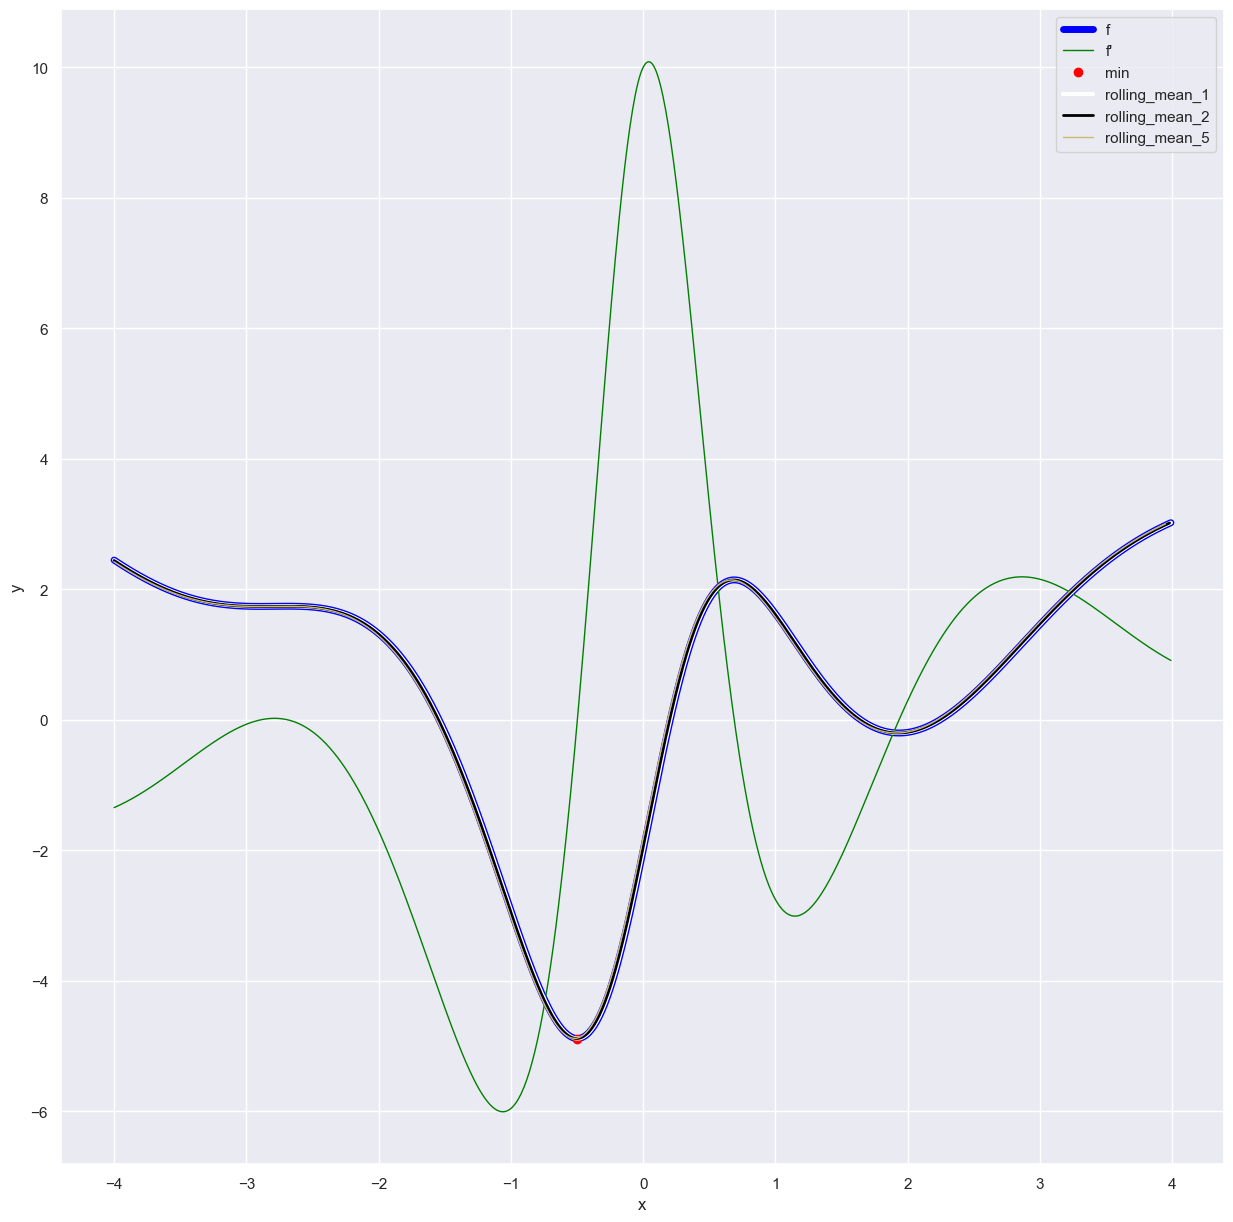

In [20]:
def func(x):
    return (5*np.sin(2*x)-np.cos(x)*np.cos(x)-1+np.abs(x*x*x)-x*x)/(x*x+1)

x = np.arange(-4,4,0.01)
y = func(x)
plt.figure(figsize=(15, 15))
plt.plot(x, y, linewidth=5, color='blue')

ix = np.arange(-4,4,0.01)
iy = sp.misc.derivative(func, ix, dx=1e-6)
func_min = sp.optimize.minimize(func, x0=0, method='nelder-mead')
plt.plot(ix, iy, linewidth=1, color='green')
plt.plot(func_min.x, func(func_min.x),'o', color='red')
plt.xlabel('x')
plt.ylabel('y')


w = [1,2,5]
r_m = rolling_mean(y, w)

plt.plot(x[:r_m[0].shape[0]], r_m[0], color='w', linewidth=3)
plt.plot(x[:r_m[1].shape[0]], r_m[1], color='black', linewidth=2)
plt.plot(x[:r_m[2].shape[0]], r_m[2], color='y', linewidth=1)
plt.legend(('f', "f'", 'min', 'rolling_mean_1', 'rolling_mean_2', 'rolling_mean_5'))



# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [21]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return x[res]

ex =np.array([50, 3, 1, 7, 20])       


Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [22]:
def sampling_np(x, n):
    return np.random.choice(x, n, replace=True)

In [23]:
test = []

for i in range(100):
    res1 = sampling_np(ex,5)
    res2 = sample(ex,5)
    test.append(sp.stats.ttest_ind(res1, res2).pvalue)

C:\Users\admin\AppData\Local\Temp\ipykernel_42944\130902504.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  test.append(sp.stats.ttest_ind(res1, res2).pvalue)


In [24]:
pos = np.array(test) >= 0.05 #выборки однородные, нулевая гипотеза о равенстве матожиданий совпадает
len(np.where(pos==True)[0])

60

In [25]:
neg = np.array(test) < 0.05 #Выборки неоднородные, нулевая гипотеза отвергается
len(np.where(neg==True)[0])

40

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [26]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

2161

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном запусков. 

In [27]:
import timeit

In [28]:
def walk_np(n: int):
    steps = np.random.choice([-3, -1, 0, 2, 3], size=n)
    return np.sum(steps)


walk_np(10_000)

1885

In [29]:
print("Function walk: ", timeit.timeit('walk(10000)', globals=globals(), number=100)) #для 100 повторений
print("Function walk_np: ", timeit.timeit('walk_np(10000)', globals=globals(), number=100))

Function walk:  1.5220261989161372
Function walk_np:  0.05053301784209907


<AxesSubplot: ylabel='Density'>

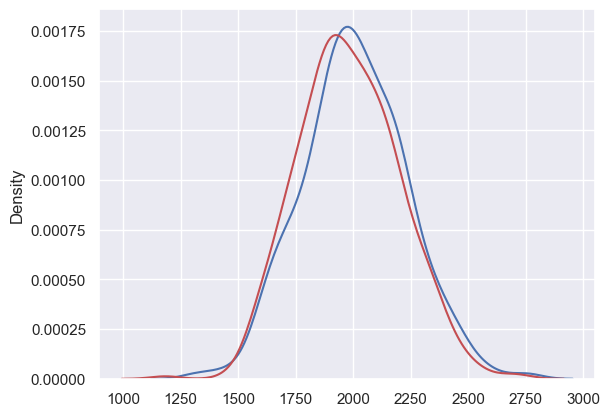

In [30]:
data_1 = [walk_np(10000) for i in range(500)]
data_2 = [walk(10000) for i in range(500)]
sns.kdeplot(data_1, color='b') #функция с numpy 
sns.kdeplot(data_2, color='r') #изначальная функция


# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [31]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


0.5265766666372504

In [32]:
from numba import njit

In [33]:
@njit
def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)

0.5420301887235344

In [34]:
import cython
from distutils.core import setup
from Cython.Build import cythonize

In [45]:
setup(ext_modules = cythonize('func.pyx'))

AssertionError: 

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.